# Penguins data - size related features - attempt to predict the species 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## get data 

In [2]:
df=pd.read_csv('penguins_size.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Basic cleaning 

In [4]:
# drop the snall number of na values 
df=df.dropna()

In [5]:
#check for duplicate values 
df.duplicated().value_counts()

False    334
dtype: int64

In [6]:
#drop the island column 
df=df.drop('island',axis=1)

## EDA 

In [12]:
sns.set(rc={"figure.figsize":(12.,6.)})
sns.set_style("whitegrid")

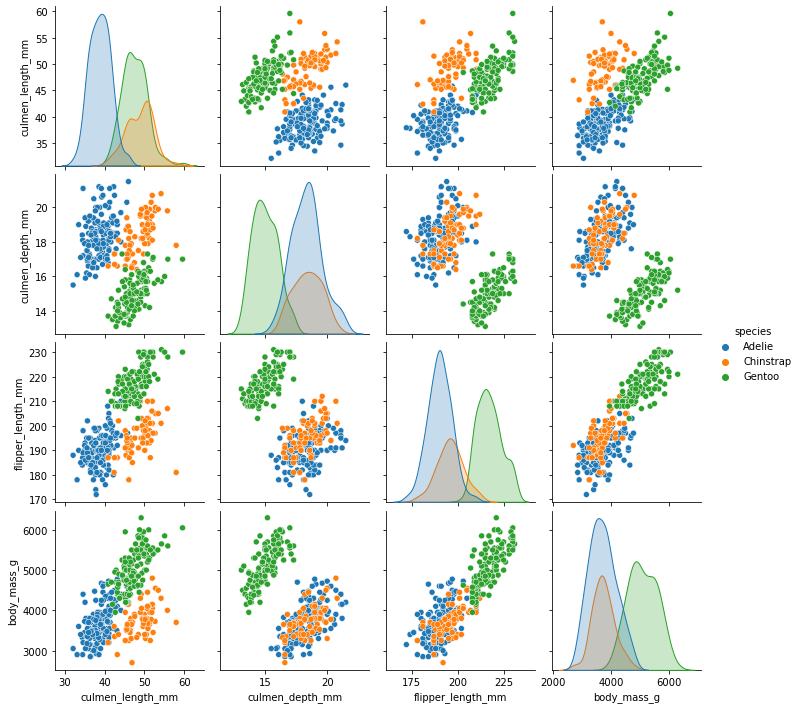

In [7]:
sns.pairplot(df, hue='species');

<AxesSubplot:xlabel='count', ylabel='species'>

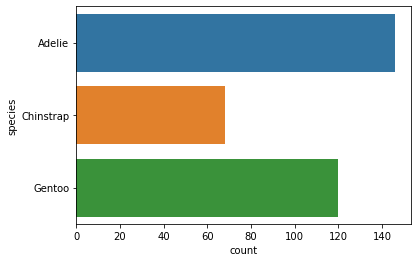

In [8]:
sns.countplot(y=df['species'])
# we have less chinstraps overall 

<AxesSubplot:xlabel='count', ylabel='sex'>

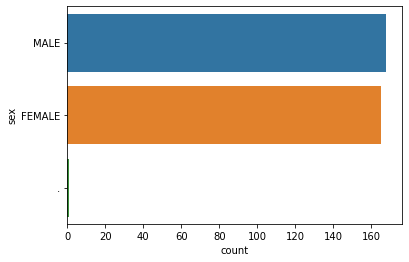

In [9]:
sns.countplot(y=df['sex'])
# looks like we have one bad row. I will drop that row 

In [10]:
df.drop(df.index[df['sex'] == '.'], inplace = True)

In [11]:
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

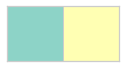

In [34]:
#set gender colours 
gender_colors= sns.color_palette("Set3",2)
sns.palplot(gender_colors)

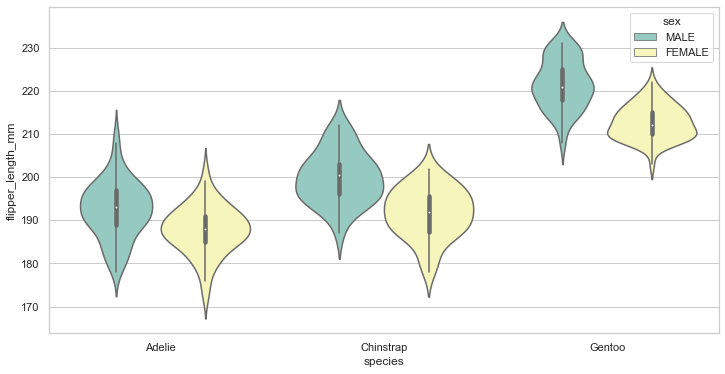

In [36]:
ax = sns.violinplot(x="species", y="flipper_length_mm", hue="sex",
                    data=df, palette=gender_colors);

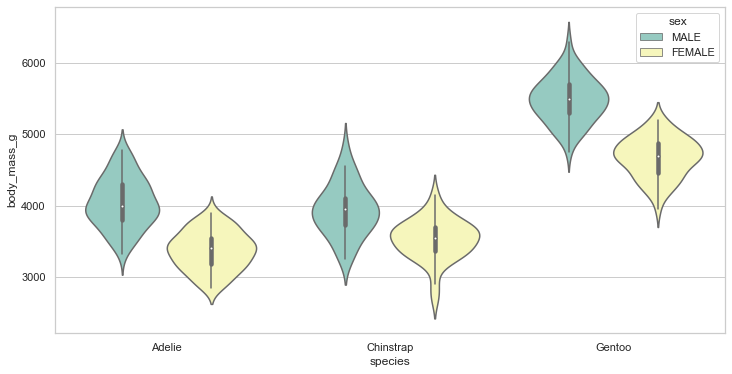

In [29]:
ax = sns.violinplot(x="species", y="body_mass_g", hue="sex",
                    data=df, palette=gender_colors);

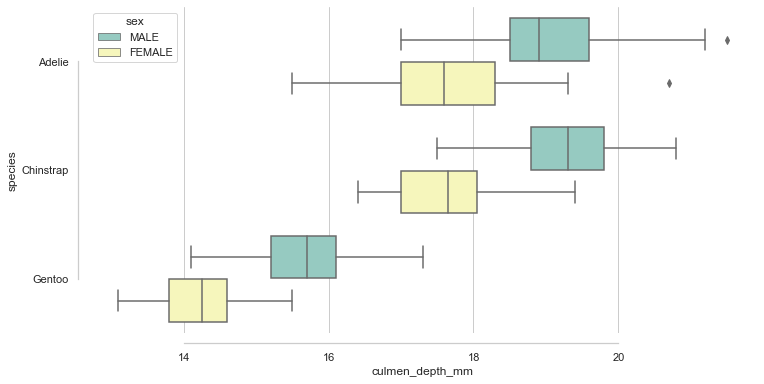

In [30]:
sns.boxplot(x="culmen_depth_mm", y="species",
            hue="sex",palette=gender_colors,
            data=df)
sns.despine(offset=10, trim=True)

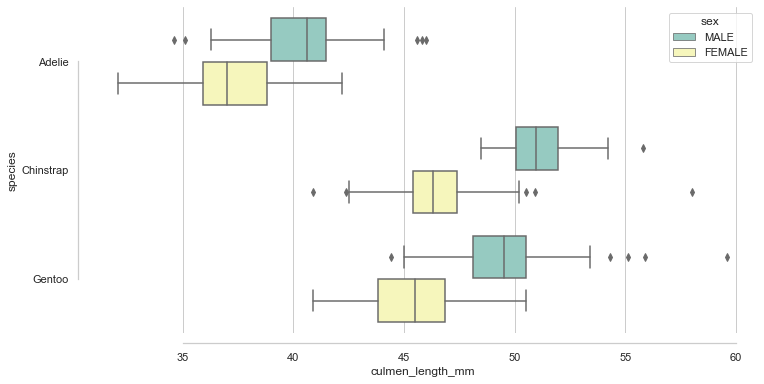

In [31]:
sns.boxplot(x="culmen_length_mm", y="species",
            hue="sex",palette=gender_colors,
            data=df)
sns.despine(offset=10, trim=True)

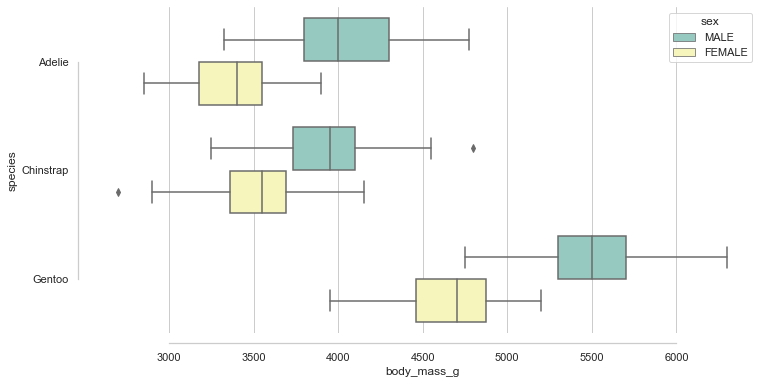

In [32]:
sns.boxplot(x="body_mass_g", y="species",
            hue="sex",palette=gender_colors,
            data=df)
sns.despine(offset=10, trim=True)

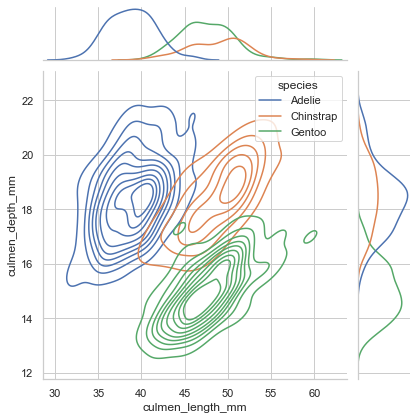

In [39]:
ax= sns.jointplot(x="culmen_length_mm", y="culmen_depth_mm", data=df, hue="species",kind="kde");

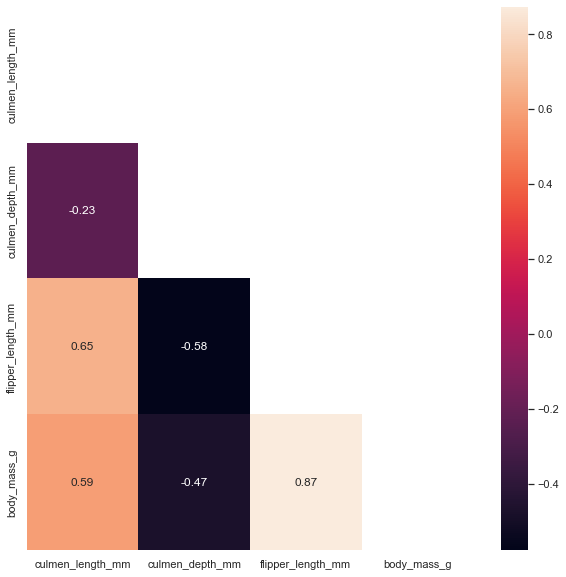

In [16]:
cm=df.corr()
mask=np.zeros_like(cm)
mask[np.triu_indices_from(mask)]=True
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(cm, mask=mask, annot=True);

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   culmen_length_mm   333 non-null    float64
 2   culmen_depth_mm    333 non-null    float64
 3   flipper_length_mm  333 non-null    float64
 4   body_mass_g        333 non-null    float64
 5   sex                333 non-null    object 
dtypes: float64(4), object(2)
memory usage: 26.3+ KB


In [18]:
df.reset_index(drop=True, inplace=True)

## pre process the data
- scaling numbers - not needed for decision tree 
- encode categories - needed for decision tree 

In [42]:
y=df['species']

In [41]:
X_dm=pd.get_dummies(df[['sex']], drop_first=True)

In [43]:
X_r=df.drop(['species', 'sex'], axis = 1) 

In [47]:
X_f=pd.concat([X_r,X_dm],axis=1)

In [48]:
X_f.head(2)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0


## Set model params 

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [60]:
clf_1 = DecisionTreeClassifier(random_state=0)

In [61]:
tree1 = clf_1.fit(X_f,y)

In [83]:
y_pred = clf_1.predict(X_f)

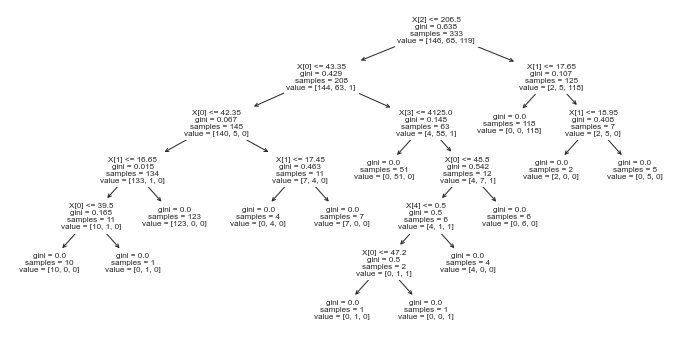

In [63]:
tree.plot_tree(tree1);

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size=0.30,random_state=40)

In [89]:
tree2 = clf_J.fit(X_train,y_train)

In [90]:
y_pred_2 = clf_J.predict(X_test)
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        36

    accuracy                           0.97       100
   macro avg       0.97      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100



In [91]:
accuracy_score(y_test,y_pred_2)

0.97

In [92]:
#check train 
y_pred_3 = clf_J.predict(X_train)
accuracy_score(y_train,y_pred_3)

0.9699570815450643

In [93]:
cm = confusion_matrix(y_test, y_pred_2)

In [94]:
cm_df = pd.DataFrame(cm,
                     index = ['Adelie','Chinstrap','Gentoo'], 
                     columns = ['Adelie','Chinstrap','Gentoo'])

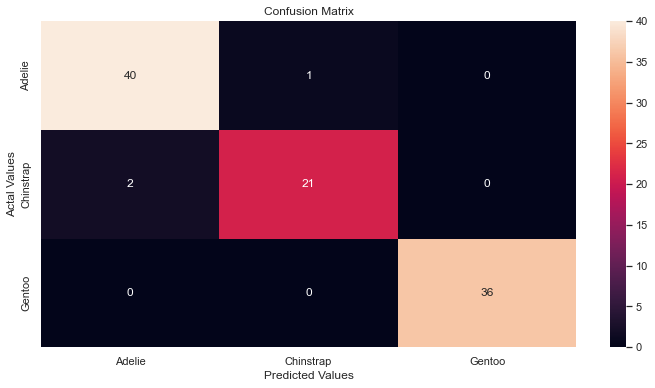

In [95]:
#Plotting the confusion matrix
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [85]:
clf_J = DecisionTreeClassifier(random_state=0,max_depth=3)

In [86]:
treeJ = clf_J.fit(X_f,y)

In [87]:
y_pred_J = clf_J.predict(X_f)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       0.99      1.00      1.00       146
   Chinstrap       1.00      0.99      0.99        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



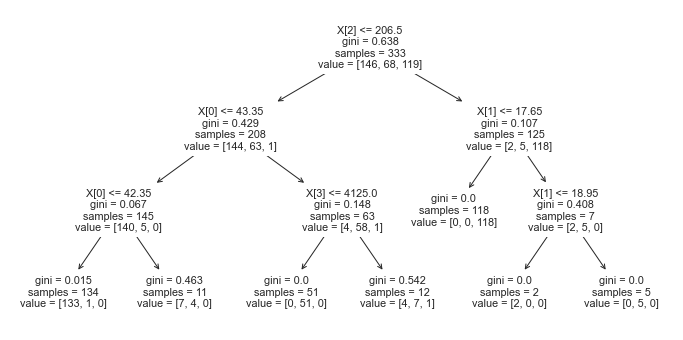

In [88]:
tree.plot_tree(treeJ);